In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords 
from tqdm import tqdm
from collections import *
import operator
import geopandas
import matplotlib.pyplot as plt
import geoplot


businesses = pd.read_csv("businesses.csv", header=0)
reviews= pd.read_csv("reviews.csv", header= 0)

In [2]:
businesses.head()

,Unnamed: 0,advertiser,alias,appointment,attrs,categories_academic,categories_scrape,claimed,coordinates,display_phone,...,phone,price_academic,price_scrape,rating_academic,rating_scrape,related,review_count_academic,review_count_scrape,transactions,url
0,0,NaN,sleep-country-toronto,False,"{'Accepts Apple Pay': 'No', 'Bike Parking': 'Y...","[{'alias': 'mattresses', 'title': 'Mattresses'...","['Mattresses', 'Furniture Stores']",True,"{'latitude': 43.66205, 'longitude': -79.38597}",+1 416-642-1180,...,1.416642e+10,4,4.0,2.5,2.5,['/biz/roche-bobois-toronto?page_src=related_b...,3,3.0,[],https://www.yelp.com/biz/sleep-country-toronto...
1,1,NaN,pest-solution-services-toronto,False,NaN,"[{'alias': 'homecleaning', 'title': 'Home Clea...",['Pest Control'],False,"{'latitude': 43.7495489, 'longitude': -79.5807...",+1 416-451-7659,...,1.416452e+10,0,NaN,5.0,5.0,NaN,1,2.0,[],https://www.yelp.com/biz/pest-solution-service...
2,2,NaN,ccim-central-canada-toronto,False,NaN,"[{'alias': 'social_clubs', 'title': 'Social Cl...",['Social Clubs'],False,"{'latitude': 43.66528, 'longitude': -79.40358}",+1 416-244-0435,...,1.416244e+10,0,NaN,5.0,5.0,NaN,1,1.0,[],https://www.yelp.com/biz/ccim-central-canada-t...
3,3,NaN,happy-lemon-markham,False,"{'Take-out': 'Yes', 'Accepts Apple Pay': 'No',...","[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...","['Bubble Tea', 'Coffee & Tea']",True,"{'latitude': 43.8258200636421, 'longitude': -7...",+1 416-855-0768,...,1.416855e+10,1,1.0,3.5,3.5,['/biz/pop-up-house-markham?page_src=related_b...,32,33.0,[],https://www.yelp.com/biz/happy-lemon-markham?a...
4,4,NaN,finch-go-bus-terminal-toronto,False,NaN,"[{'alias': 'publictransport', 'title': 'Public...",['Public Transportation'],False,"{'latitude': 43.78268, 'longitude': -79.4158}",NaN,...,NaN,0,NaN,2.5,2.5,NaN,7,7.0,[],https://www.yelp.com/biz/finch-go-bus-terminal...


In [3]:
id=[]
latitude=[]
longitude=[]


for x in range(businesses.shape[0]):
    if (businesses.iloc[x,8].split()[1].replace(',','')!= 'None' ):
        if (float(businesses.iloc[x,8].split()[1].replace(',',''))> 43 and float(businesses.iloc[x,8].split()[1].replace(',',''))<44):
            if(float(businesses.iloc[x,8].split()[3].replace('}',''))>-80 and float(businesses.iloc[x,8].split()[3].replace('}',''))<-79):
                latitude.append(float(businesses.iloc[x,8].split()[1].replace(',','')))
                longitude.append(float(businesses.iloc[x,8].split()[3].replace('}','')))
                id.append(businesses.iloc[x,13])

In [4]:
df = pd.DataFrame(
    {'Unique_id': id,
     'Latitude': latitude,
     'Longitude': longitude})


gdf = geopandas.GeoDataFrame(df, geometry= geopandas.points_from_xy(df.Longitude, df.Latitude))


df_neighbourhoods = geopandas.read_file("Neighbourhoods.geojson")

In [5]:
##Businesses DataFrame with associated Longitude and Latitude as a POINT object
gdf.head()

,Unique_id,Latitude,Longitude,geometry
0,bSQGCheX1BwvL67Az1OJlA,43.662050,-79.385970,POINT (-79.38597 43.66205)
1,Z7JV11GXw_RsGr8Ik_Hsag,43.749549,-79.580750,POINT (-79.5807504 43.7495489)
2,kI7ObOAe-Wvjdtnv-8Cu7w,43.665280,-79.403580,POINT (-79.40358000000001 43.66528)
3,Xo1LNzhnwE-ilqsM3ybs9Q,43.825820,-79.306346,POINT (-79.30634580552579 43.8258200636421)
4,83V1E_ePwuLMW5EI40fIBQ,43.782680,-79.415800,POINT (-79.4158 43.78268)


In [6]:
##Toronto Neighbourhood Dataframe
df_neighbourhoods.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,1261,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,POLYGON ((-79.43591570873059 43.68015339477487...
1,1262,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,POLYGON ((-79.41095783825973 43.70408282301482...
2,1263,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,POLYGON ((-79.39119482591805 43.68108112277795...
3,1264,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,POLYGON ((-79.50528791818931 43.75987349878096...
4,1265,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.4396873322608 43.70560981891119,..."


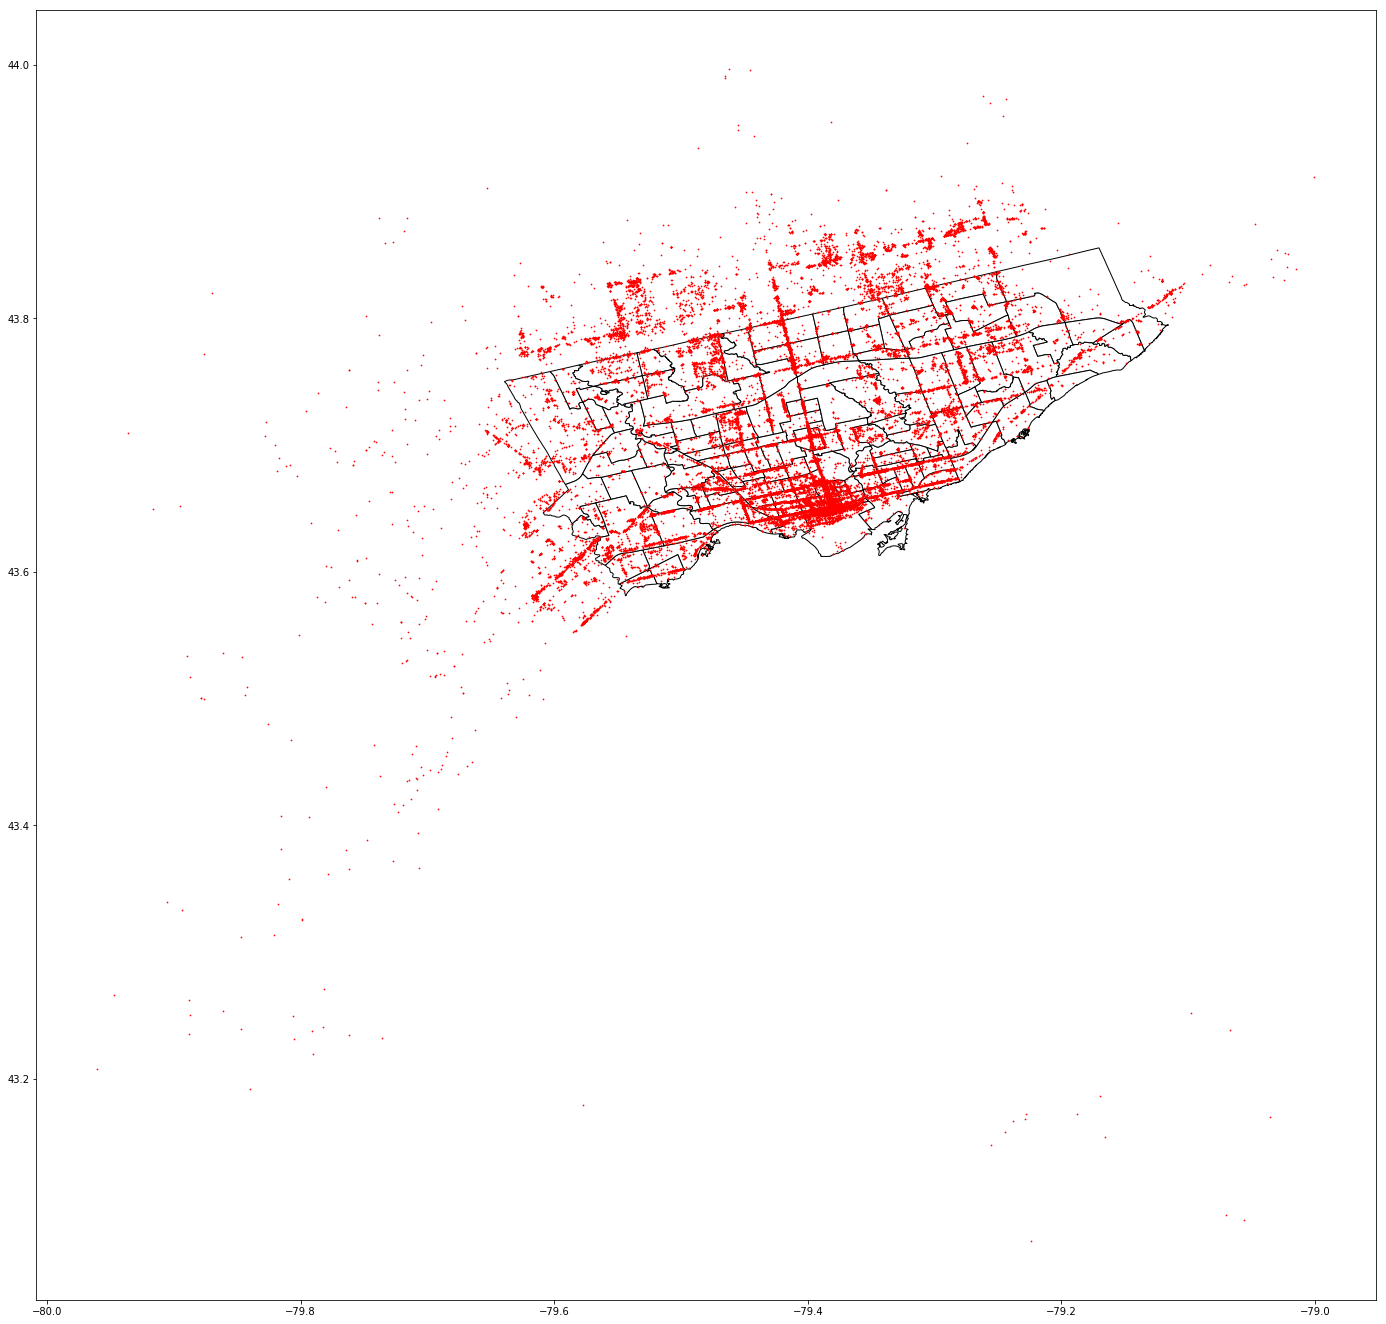

In [7]:
#Plot Businesses location of the neighbourhoods divided map of Toronto
ax = df_neighbourhoods.plot(color='white', edgecolor='black', figsize=(24,24))
gdf.plot(ax=ax, marker='o', color='red', markersize=0.5)
plt.show()
